In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
# Input of variables
r= 0.03
sigma = 0.25
S_0=100
K=120
T=1
N_list = [i for i in range(1,21,1)]
Scheme_1 = []
Scheme_2 = []
Scheme_3 = []
n = 10**5
# Consider different N in [1,2,3,...,20]
for N in N_list:
    dt = T/N
    res_1=[]
    res_2=[]
    res_3=[]
    # simulation step
    for i in range(n):
        Path1 = [S_0]
        Path2 = [S_0]
        Path3 = [S_0]
        for j in range(1,N+1,1):
            Z = np.random.normal(0, 1)
            # calculate three scheme 
            Path1.append( Path1[j-1]*np.exp((r-sigma**2/2)*dt+sigma*Z*np.sqrt(dt))) # Exact 
            Path2.append( Path2[j-1]+r*Path2[j-1]*dt+sigma*Path2[j-1]*Z*np.sqrt(dt)) # First Order
            Path3.append( Path3[j-1]+r*Path3[j-1]*dt+sigma*Path3[j-1]*Z*np.sqrt(dt)+r*sigma*Path3[j-1]*dt*Z*np.sqrt(dt)\
                        + 0.5*(sigma**2*Path3[j-1]*dt*(Z**2-1)+r**2*Path3[j-1]*(dt)**2)) # Second Order
                
            # True Price

        res_1.append(max(Path1[-1]-K,0)*np.exp(0-r*T))
        res_2.append(max(Path2[-1]-K,0)*np.exp(0-r*T))
        res_3.append(max(Path3[-1]-K,0)*np.exp(0-r*T))

        
    Scheme_1.append(np.mean(res_1))
    Scheme_2.append(np.mean(res_2))
    Scheme_3.append(np.mean(res_3))
            

        
        

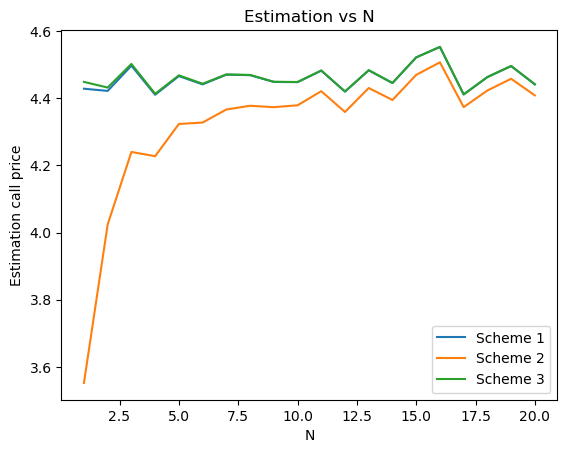

In [8]:
# Estimates versus the number of steps N, Plot 1:
# Plotting the lines
plt.plot(N_list, Scheme_1, label='Scheme 1')
plt.plot(N_list, Scheme_2, label='Scheme 2')
plt.plot(N_list, Scheme_3, label='Scheme 3')

# Adding labels and legend
plt.xlabel('N')
plt.ylabel('Estimation call price')
plt.title('Estimation vs N')
plt.legend()

# Displaying the plot
plt.show()

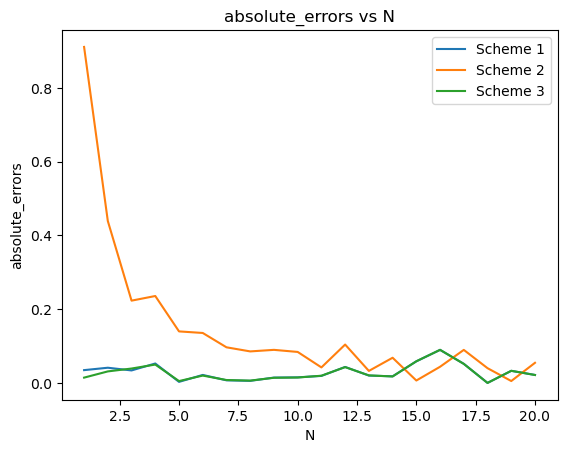

In [9]:
# absolute errors versus N
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

True_price = black_scholes_call(S_0, K, T, r, sigma)

absolute_errors_S1 = [abs(x - True_price) for x in Scheme_1]
absolute_errors_S2 = [abs(x - True_price) for x in Scheme_2]
absolute_errors_S3 = [abs(x - True_price) for x in Scheme_3]
# Plotting the lines
plt.plot(N_list, absolute_errors_S1, label='Scheme 1')
plt.plot(N_list, absolute_errors_S2, label='Scheme 2')
plt.plot(N_list, absolute_errors_S3, label='Scheme 3')

# Adding labels and legend
plt.xlabel('N')
plt.ylabel('absolute_errors')
plt.title('absolute_errors vs N')
plt.legend()

# Displaying the plot
plt.show()

In [10]:
# Create data for the DataFrame
data = {
    'Scheme 1':Scheme_1,
    'Scheme 2': Scheme_2,
    'Scheme 3': Scheme_3
}

# Create the DataFrame with specified index and column names
df = pd.DataFrame(data)
df

,Scheme 1,Scheme 2,Scheme 3
0,4.428578,3.552378,4.448908
1,4.422071,4.024397,4.432034
2,4.497203,4.240203,4.502361
3,4.410580,4.227629,4.413482
4,4.466198,4.323573,4.468391
5,4.441596,4.327845,4.443345
6,4.470403,4.366693,4.471209
7,4.468953,4.377825,4.469630
8,4.448791,4.373611,4.449302
9,4.448162,4.379250,4.448607
